#**Quantum Neural Network for Neuronal Spike Train Classification**

##**Background**


A neuronal 'spike' is when a neuron fires or reaches an action potential. Neuronal Spike Train Data gives time series data on when a single neuron fires and how frequently. In September 2022, a paper was published on the Spikebench dataset ([source](https://www.biorxiv.org/content/10.1101/2021.03.24.436765v2.full.pdf)), exploring new classical machine learning approaches to the classification and understanding of these neuronal spike patterns. The accompanying GitHub repository ([source](https://github.com/lzrvch/spikebench/tree/master)) is available publically for use.

While the paper has opened new avenues for neuronal spike train analysis, its reliance on classical computational mechanics limits its capability to capture the underlying complex correlations present in spike train activities. The intricate relationships within their firing sequences, the differentiation between neuronal types, and the associations between individual spike train activities and the broader neural circuit states present challenges that classical mechanics might not fully address.

Quantum Machine Learning is currently limited by number of qubits and quantum noise and errors, but it nevertheless has the potential to overcome these classical shortcomings. **This project seeks to complement this recent research by introducing quantum computing methodologies to the field, thereby exploring whether Quantum Machine Learning might be an avenue to overcome the limitations of classical approaches.**

**Objectives**

1. Encode Neuronal Spike Train Data into quantum.
2. Develop a Quantum Neural Network to train on this Neuronal Spike Train Data
3. Improve the model using hybrid quantum-classical approaches
4. Test the model
5. Suggest avenues for future research

##**Loading & Preprocessing Spike Train Data**

###**Loading Data**

In [4]:
#Delete any existing spikebench directory in the current working directory,
#clone a fresh copy of the spikebench repository from GitHub, and install
#it as a Python package.

! rm -rf ./spikebench && git clone https://github.com/lzrvch/spikebench.git
! cd ./spikebench && pip install .

Cloning into 'spikebench'...
remote: Enumerating objects: 886, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 886 (delta 8), reused 5 (delta 3), pack-reused 869
Receiving objects: 100% (886/886), 1.62 MiB | 14.05 MiB/s, done.
Resolving deltas: 100% (510/510), done.
Processing /content/spikebench
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# This block sets up the environment by importing necessary functions for data loading,
#setting a random seed for consistent results across runs, importing a machine learning model,
#and importing evaluation metrics. This setup is typical in machine learning workflows where
#data is processed, a model is used, and its performance is evaluated.
import matplotlib.pyplot as plt
import pandas as pd
from spikebench import load_retina
from spikebench.helpers import set_random_seed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, roc_auc_score

set_random_seed(0)

In [6]:
# Load the data, it's already set up in a standard format for ML
X_train, X_test, y_train, y_test, gr_train, gr_test = load_retina(random_seed=0)

# Convert to DataFrame for easy viewing
df_x_train = pd.DataFrame(X_train)
df_x_test = pd.DataFrame(X_test)
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)
df_gr_train = pd.DataFrame(gr_train)
df_gr_test = pd.DataFrame(gr_test)

# View the first 5 rows of the x_train DataFrame
print(df_x_train.head(5))


Downloading...
From: https://drive.google.com/uc?id=1HqZSs7r14bC97gWvw_VJ63CsVl3Ug6DM
To: /content/data/retina/retinal_data.zip
100%|██████████| 84.3M/84.3M [00:00<00:00, 157MB/s]


      0       1       2        3       4       5       6       7        8    \
0  2063.0  3306.0  3546.0   2118.0  3013.0  2234.0  3035.0  2123.0   3380.0   
1  3576.0  2121.0  3765.0   3368.0  1997.0  1991.0  1969.0  2798.0   3505.0   
2  7549.0  1433.0  2659.0   7901.0  7235.0  7379.0  4375.0  3093.0  11387.0   
3  2755.0  3518.0  3482.0  11940.0  9847.0  1572.0  6177.0  6762.0   8069.0   
4  1135.0  2032.0  5453.0   7316.0  3985.0  3483.0  3625.0  4458.0   8397.0   

      9    ...      190     191      192     193     194      195     196  \
0  2713.0  ...   1721.0  1978.0   2397.0  1001.0  1882.0   3203.0  3471.0   
1  3159.0  ...  15096.0  7548.0  10555.0  3381.0  2862.0  10371.0  3608.0   
2  3547.0  ...   3010.0  8666.0   3355.0  6142.0  4155.0   5912.0  3596.0   
3  7309.0  ...   5477.0  4271.0   2288.0  5648.0  7053.0   2372.0  6126.0   
4  2942.0  ...   2349.0  4487.0   2628.0  4947.0  4617.0   3197.0  3264.0   

       197     198     199  
0   2265.0  3713.0  1577.0  
1   

In [7]:
# View the first 5 rows of the x_test DataFrame
print(df_x_test.head(5))

       0        1         2         3         4         5        6    \
0     79.0     81.0   23494.0  204983.0  238625.0   24234.0    683.0   
1    113.0  85851.0      77.0   34720.0   37634.0  151055.0  26114.0   
2     77.0    253.0  121448.0   78079.0   38542.0   19569.0    161.0   
3  69853.0  10145.0   54445.0      91.0   49312.0   41298.0  22721.0   
4     90.0   4726.0  115991.0      94.0     512.0   60533.0  58126.0   

        7         8        9    ...      190       191       192       193  \
0   75969.0      81.0    597.0  ...  46743.0   21089.0      93.0  129734.0   
1  102064.0      85.0  69070.0  ...     85.0      86.0  174637.0     153.0   
2      73.0   27606.0    100.0  ...    200.0  143694.0   32313.0      80.0   
3   93622.0  115338.0  17600.0  ...     69.0  200665.0      82.0  105731.0   
4      88.0    3743.0  58968.0  ...     93.0   62819.0      90.0     108.0   

       194       195      196       197       198       199  
0     75.0     231.0  80525.0      9

In [8]:
# View the first 5 rows of the y_test DataFrame
print(df_y_train.head(5))

     0
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0


In [9]:
# View the first 5 rows of the y_test DataFrame
print(df_y_test.head(5))

     0
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0


**Understanding the Data**

1. **Interspike Intervals (ISIs):** Each column of the X dataset is an ISI, which is typical for neuronal spike train data. An ISI is the time duration between consecutive spikes in a neuron's spike train.
For example, if the first spike occurs at time $t_1$ and the second spike at time $t_2$, the interspike interval is $(t_2 - t_1)$.

2. **Classification Task:** The Y dataset includes labels per row (AKA sample) of the X dataset. These labels are which visual stimuli caused the retinal spike train response (e.g., a white noise checkerboard, a moving bar, natural movies).

3. **Classical Training & Testing the Model:** The classical training process involves using a subset of the data (training set) to teach the model how different ISI patterns correspond to different types of stimuli. The model learns to associate specific firing patterns with specific visual stimuli.

###**Deciding Encoding Scheme**

There are three major encoding schemes I can choose amongst to encode my data into quantum states. At a high-level, these are:

* **Angle Encoding:** Features can be encoded into the angles of rotation gates applied to qubits. The number of features is typically equal to the number of qubits in this case, but some variations might allow for more compact encoding.

* **Amplitude Encoding:** This method encodes more data into fewer qubits by using the amplitudes of the quantum state. With n qubits, one can theoretically encode $2^n$ features. However, amplitude encoding is complex and requires precise control.

* **Basis Encoding:** In its simplest form, one feature can be encoded per qubit (binary encoding). So if IBM Qiskit has 20 qubits, then I can encode 20 binary features.

**In-Depth Definitions**


* **Angle Encoding** uses the values of classical data to determine the angles in quantum gate operations. For instance, a classical value $x$ could be used as the angle in a rotation gate (like $RX(x)$, $RY(x)$, or $RZ(x)$) applied to a qubit, effectively encoding the classical data into the rotational state of the qubit.


* **Amplitude Encoding** represents classical data in the amplitudes of a quantum state. A classical vector of $N$ values is encoded into the amplitudes of a quantum state with $\log_2(N)$ qubits. For example, a classical vector $\left[ x_0, x_1, x_2, ..., x_{N-1} \right]$ is represented as $\sum_{i=0}^{N-1} x_i |{i}\rangle$ in a quantum state, where $|{i}\rangle$ are the computational basis states. The classical data vector needs to be normalized before encoding, as the sum of the squares of the amplitudes in a quantum state must equal 1, in line with the normalization condition of quantum mechanics).


* **Basis Encoding** directly maps classical binary data onto the states of qubits. For a binary string, each bit is represented by the corresponding qubit state. For instance, a binary string like '101' would be represented by a three-qubit state where the first and last qubits are in the state $|{1}\rangle$, and the second qubit is in the state $|{0}\rangle$. This direct mapping wherein each classical bit corresponds to the state of one qubit means that $n$ bits require $n$ qubits.

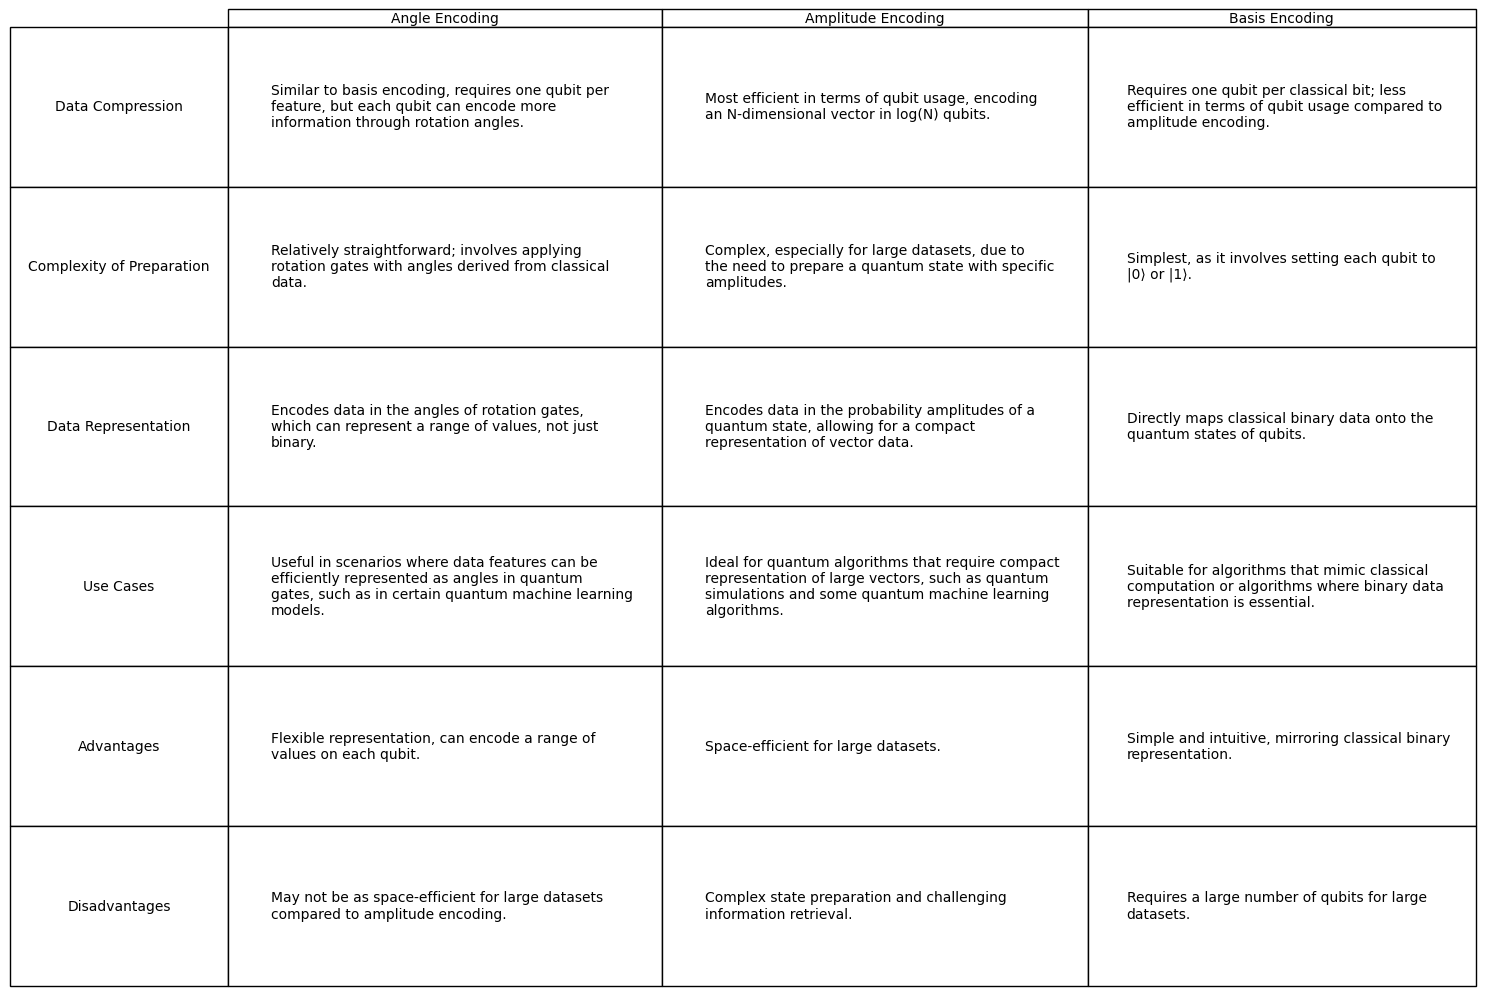

In [64]:
# Create comparison chart
# Adjust the table layout to expand the rows to accommodate the text

# Calculate the table size based on the number of line breaks in the text
max_lines_per_cell = df.applymap(lambda x: x.count('\n') + 1).max().max()
row_height = 0.05 * max_lines_per_cell  # Adjust the row height based on the number of lines

plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.axis('off')

# Creating the table with adjusted row heights
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='left', rowLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Adjusting the row heights
for key, cell in table.get_celld().items():
    if key[0] == 0:
        continue  # Skip the first row (column headers)
    cell.set_height(row_height)

plt.tight_layout()
plt.show()


**Conclusion:** It seems that Amplitude Encoding is the most complex but also the best for efficiently representing large datasets in quantum states. Angle Encoding is second-most complex and is also suitable for encoding a variety of features into qubits. Basis Encoding is the most straightforward in every sense, because it directly translates classical bits to quantum states. However, it cannot be used for large datasets.


**Decision:** For the sake of time and simplicity for this project, I am going to reduce both the number of features and the number of samples in my dataset in order to use Basis Encoding.

###**Preprocessing Data**

Our training set has 8,006 rows (samples) and 200 columns (features). The actual data in each index are numbers in the thousands, representing miliseconds. I need to convert this data to something I can actually use.

**Estimating a Reasonable Limit**

Given these factors, if using a publicly available quantum computer or simulators via Cirq, a reasonable limit for the number of features would be within the range of the qubits available on the hardware I'm using. For most current systems and practical purposes, handling up to 10-20 features might be feasible.

However, it's important to note that quantum machine learning and quantum computing are rapidly evolving fields, and these capabilities are expected to grow significantly as technology advances.

**Preprocessing for Basis Encoding**

Given the current limitations with amplitude and angle encoding, I'm going to stick with basis encoding—-though this limits me to only handling up to 20 features of the 200... and I have to convert these features to binary. I will use 15 features for the purpose of this project.

**Reducing No. Classes**

Instead of differentiating among 4 different visual stimuli, I'm only going to differentiate among 2, because I only have 0s and 1s to work with for labeling. For Class 1, I'll prepare the first qubit in state |0⟩ and the second class in state |1⟩. The X and Y datasets I have only represent 2 visual stimuli, and I will neglect the Gr dataset moving forward which represents the other 2 possible visual stimuli.

**Reducing No. Features**

In typical neuronal time series data, such as the data used in the Spikebench paper, each column represents the next neuron action potential, and the data in the index is the number of milliseconds between the last neuron firing and this one. To use this data in quantum computing, I need to change the data in the indices to be 0s and 1s. I can do this by setting each column (feature) to be a set number of milliseconds. For example, if column 1 represents 1000 ms and column 2 represents 2000 ms, then Row 1 Column 1 would contain a 1 in its index if that neuron fired within time 0-1000 ms and a 0 if not.

Now I'm going to change my data to this binary format by finding the 50% threshold of action potentials:

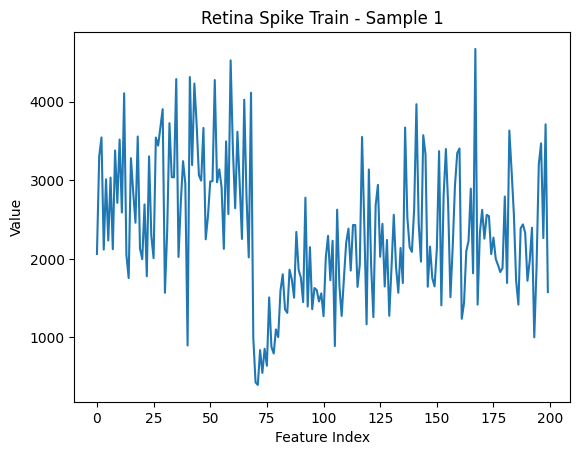

In [10]:
#From the data above, it's clear I need to examine the data to set a threshold
#for turning this into binary.

import matplotlib.pyplot as plt

# This is an example of a simple line plot for the first row of data
plt.plot(df_x_train.iloc[0])
plt.title("Retina Spike Train - Sample 1")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()


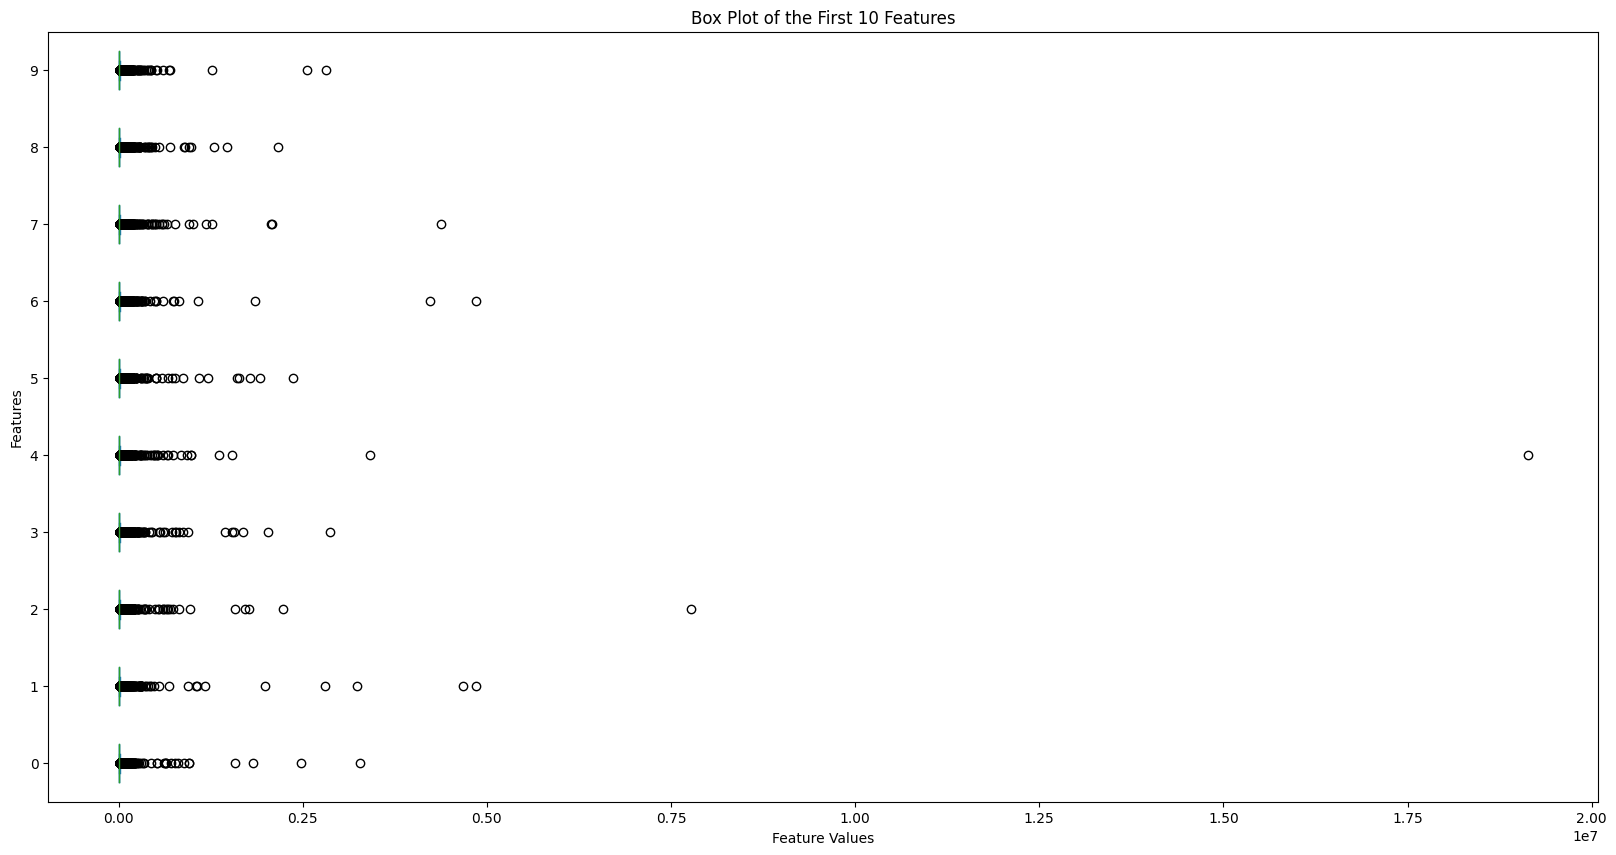

In [11]:
# Box plot for the first few columns
ax = df_x_train.iloc[:, :10].plot(kind='box', figsize=(20, 10), vert=False)
ax.set_title('Box Plot of the First 10 Features')
ax.set_xlabel('Feature Values')
ax.set_ylabel('Features')
plt.show()


In [12]:
# Calculate the 50th percentile as the threshold
threshold = df_x_train.quantile(0.5).mean()

# Convert data to binary format
bin_xtrain = df_x_train.applymap(lambda x: 1 if x > threshold else 0)

# Select the first 15 columns
bin_xtrain = bin_xtrain.iloc[:, :15]

# View the binary data
print(bin_xtrain.head(10))

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0   0   1   1   0   1   0   1   0   1   1   1   1   1   0   0
1   1   0   1   1   0   0   0   1   1   1   0   0   1   0   0
2   1   0   1   1   1   1   1   1   1   1   1   1   0   1   1
3   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1
4   0   0   1   1   1   1   1   1   1   1   1   0   1   0   1
5   0   1   1   1   0   1   1   1   1   0   1   1   1   0   1
6   0   1   1   1   0   1   0   0   1   1   0   0   1   0   1
7   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1
8   1   1   1   0   1   1   1   0   0   1   0   1   1   0   1
9   1   1   0   1   1   0   0   1   0   1   0   1   1   1   1


In [13]:
print(threshold)

2541.8975


In [14]:
#Use same threshold as X_train to convert X_test
# Convert data to binary format
bin_xtest = df_x_test.applymap(lambda x: 1 if x > threshold else 0)

# Select the first 15 columns
bin_xtest = bin_xtest.iloc[:, :15]

# View the binary data
print(bin_xtest.head(10))

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0   0   0   1   1   1   1   0   1   0   0   1   0   1   0   0
1   0   1   0   1   1   1   1   1   0   1   0   0   1   1   0
2   0   0   1   1   1   1   0   0   1   0   1   1   0   1   1
3   1   1   1   0   1   1   1   1   1   1   1   1   0   0   1
4   0   1   1   0   0   1   1   0   1   1   1   0   0   1   0
5   1   0   1   1   1   0   0   1   0   1   1   1   1   1   1
6   1   1   0   0   1   0   0   1   1   0   1   1   0   0   1
7   1   0   1   1   0   1   1   1   1   1   1   0   0   1   1
8   1   1   1   1   0   0   1   0   0   1   1   0   0   1   0
9   1   0   1   1   0   1   0   0   0   1   1   1   0   1   0


In [15]:
#Use same threshold as X_train to convert X_test,
#Y_train and Y_test are already in binary so let's just rename them

bin_ytrain = df_y_train

bin_ytest = df_y_test

In [16]:
# Select and print the last 10 columns
print(bin_xtest.iloc[:, -10:])

      5   6   7   8   9   10  11  12  13  14
0      1   0   1   0   0   1   0   1   0   0
1      1   1   1   0   1   0   0   1   1   0
2      1   0   0   1   0   1   1   0   1   1
3      1   1   1   1   1   1   1   0   0   1
4      1   1   0   1   1   1   0   0   1   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
3645   0   1   0   0   0   1   1   0   0   0
3646   0   1   1   0   0   0   0   1   1   0
3647   0   0   1   1   1   0   1   1   1   1
3648   0   0   0   1   0   1   1   1   0   1
3649   0   0   0   1   1   0   0   1   1   0

[3650 rows x 10 columns]


In [17]:
# Select and print the last 10 columns
print(bin_ytrain.iloc[:, -10:])

        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
8001  0.0
8002  0.0
8003  0.0
8004  0.0
8005  0.0

[8006 rows x 1 columns]


In [18]:
# Select and print the last 10 columns
print(bin_ytest.iloc[:, -10:])

        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
3645  0.0
3646  0.0
3647  0.0
3648  0.0
3649  0.0

[3650 rows x 1 columns]


Because 8,006 rows of training data and 3,650 rows of test data is computationally intensive, I'm going to reduce the number of samples in each dataframe. I also know that the first many rows of each dataframe correspond to Visual Stimulus 2 and the last many rows correspond to Visual Stimulus 1.

With 15 qubits needed for each sample, a quantum simulator on a typical laptop can basis encode small-scale datasets, like 10 to 20 rows, without too much computational strain. To allow for rapid editing, I will change ecah dataset to only contain the first 10 and last 10 rows.

In [19]:
# Select the first 10 and last 10 rows
mod_xtrain = pd.concat([bin_xtrain.head(10), bin_xtrain.tail(10)])
print(mod_xtrain)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0      0   1   1   0   1   0   1   0   1   1   1   1   1   0   0
1      1   0   1   1   0   0   0   1   1   1   0   0   1   0   0
2      1   0   1   1   1   1   1   1   1   1   1   1   0   1   1
3      1   1   1   1   1   0   1   1   1   1   1   1   1   1   1
4      0   0   1   1   1   1   1   1   1   1   1   0   1   0   1
5      0   1   1   1   0   1   1   1   1   0   1   1   1   0   1
6      0   1   1   1   0   1   0   0   1   1   0   0   1   0   1
7      1   1   1   1   1   1   1   1   1   1   0   1   1   1   1
8      1   1   1   0   1   1   1   0   0   1   0   1   1   0   1
9      1   1   0   1   1   0   0   1   0   1   0   1   1   1   1
7996   1   0   1   1   1   1   1   0   1   1   1   0   1   1   1
7997   1   0   1   1   1   1   0   1   1   1   1   0   1   0   1
7998   0   1   0   1   0   0   1   1   1   1   0   1   1   1   0
7999   1   0   1   1   0   1   1   1   0   1   0   1   1   1   0
8000   1   1   1   1   0 

In [20]:
# Reset the index of the DataFrame to rename the rows
mod_xtrain.reset_index(drop=True, inplace=True)
print(mod_xtrain)

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   1   1   0   1   0   1   0   1   1   1   1   1   0   0
1    1   0   1   1   0   0   0   1   1   1   0   0   1   0   0
2    1   0   1   1   1   1   1   1   1   1   1   1   0   1   1
3    1   1   1   1   1   0   1   1   1   1   1   1   1   1   1
4    0   0   1   1   1   1   1   1   1   1   1   0   1   0   1
5    0   1   1   1   0   1   1   1   1   0   1   1   1   0   1
6    0   1   1   1   0   1   0   0   1   1   0   0   1   0   1
7    1   1   1   1   1   1   1   1   1   1   0   1   1   1   1
8    1   1   1   0   1   1   1   0   0   1   0   1   1   0   1
9    1   1   0   1   1   0   0   1   0   1   0   1   1   1   1
10   1   0   1   1   1   1   1   0   1   1   1   0   1   1   1
11   1   0   1   1   1   1   0   1   1   1   1   0   1   0   1
12   0   1   0   1   0   0   1   1   1   1   0   1   1   1   0
13   1   0   1   1   0   1   1   1   0   1   0   1   1   1   0
14   1   1   1   1   0   0   0   1   1   1   1   1   1 

In [21]:
#Now repeat above for xtest, ytrain, and ytest
mod_xtest = pd.concat([bin_xtest.head(10), bin_xtest.tail(10)])
mod_xtest.reset_index(drop=True, inplace=True)
print(mod_xtest)

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   0   1   1   1   1   0   1   0   0   1   0   1   0   0
1    0   1   0   1   1   1   1   1   0   1   0   0   1   1   0
2    0   0   1   1   1   1   0   0   1   0   1   1   0   1   1
3    1   1   1   0   1   1   1   1   1   1   1   1   0   0   1
4    0   1   1   0   0   1   1   0   1   1   1   0   0   1   0
5    1   0   1   1   1   0   0   1   0   1   1   1   1   1   1
6    1   1   0   0   1   0   0   1   1   0   1   1   0   0   1
7    1   0   1   1   0   1   1   1   1   1   1   0   0   1   1
8    1   1   1   1   0   0   1   0   0   1   1   0   0   1   0
9    1   0   1   1   0   1   0   0   0   1   1   1   0   1   0
10   1   0   1   0   0   0   1   0   0   0   1   1   1   0   0
11   0   0   1   1   1   0   0   1   1   1   1   0   0   1   0
12   0   1   1   0   0   1   1   0   0   0   1   1   0   1   0
13   0   1   1   0   0   0   1   0   0   0   1   0   0   0   1
14   0   1   0   1   0   0   1   1   1   1   0   0   1 

In [22]:
mod_ytrain = pd.concat([bin_ytrain.head(10), bin_ytrain.tail(10)])
mod_ytrain.reset_index(drop=True, inplace=True)
print(mod_ytrain)

      0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10  0.0
11  0.0
12  0.0
13  0.0
14  0.0
15  0.0
16  0.0
17  0.0
18  0.0
19  0.0


In [23]:
mod_ytest = pd.concat([bin_ytest.head(10), bin_ytest.tail(10)])
mod_ytest.reset_index(drop=True, inplace=True)
print(mod_ytest)

      0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10  0.0
11  0.0
12  0.0
13  0.0
14  0.0
15  0.0
16  0.0
17  0.0
18  0.0
19  0.0


##**Basis Encoding into Quantum**

1. Qubit Representation: Each line in the output represents a qubit. The number before the colon (0:, 1:, 2:, etc.) is the identifier of the qubit.

2. Gates: The X on each line represents a Pauli-X gate, often called a "bit-flip" gate in quantum computing. This gate flips the state of a qubit from |0⟩ to |1⟩ or vice versa.

3. Encoded Data: The presence of an X on a qubit line indicates that the corresponding feature in the sample is 1. The presence of an I on a qubit indicates a feature value of 0.

4. Features and Samples: Each qubit (each row/line) corresponds to one feature, and each column of Xs represents the state of all qubits for a particular sample. I have 15 features so there should be 15 rows/lines.


In [24]:
#First I need to install Cirq to encode these samples into quantum

! pip install cirq

import cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00
INFO: pip is looking a

In [25]:
# To encode these samples, I'm going to add an X Pauli gate when there's a 1,
#  which represents changing from the 0 state, and I'll add an identity gate
#  when there's a 0, to show that it's unchanged from the natural state.

def encode_samples_in_quantum_basis(samples_df):
    """
    Encodes a list of samples into a quantum circuit using basis encoding.

    Args:
    samples_df: df of int where each index is a list of binary features.

    Returns:
    cirq.Circuit: A Cirq circuit with the encoded quantum states.
    """
    samples = samples_df.values.tolist()

    num_features = len(samples[0])  # Number of features
    qubits = [cirq.LineQubit(i) for i in range(num_features)]
    circuit = cirq.Circuit()

    # If I wanted to create a superposition to each qubit initially, I'd apply a Hadamard gate like this:
    # for qubit in qubits:
    #     circuit.append(cirq.H(qubit))

    # Now encode each sample
    for sample in samples:
        for i, feature in enumerate(sample):
            if feature == 1:
                circuit.append(cirq.X(qubits[i]))
            else:
                circuit.append(cirq.I(qubits[i]))  # Identity gate for 'no operation'

        circuit.append(cirq.Moment())  # Separate each sample

    return circuit

qc_xtrain = encode_samples_in_quantum_basis(mod_xtrain)
print(qc_xtrain)


0: ────I───X───X───X───I───I───I───X───X───X───X───X───I───X───X───I───X───X───X───X───────

1: ────X───I───I───X───I───X───X───X───X───X───I───I───X───I───X───X───X───X───X───X───────

2: ────X───X───X───X───X───X───X───X───X───I───X───X───I───X───X───X───X───I───I───X───────

3: ────I───X───X───X───X───X───X───X───I───X───X───X───X───X───X───X───X───I───X───I───────

4: ────X───I───X───X───X───I───I───X───X───X───X───X───I───I───I───X───X───X───I───X───────

5: ────I───I───X───I───X───X───X───X───X───I───X───X───I───X───I───X───X───X───X───X───────

6: ────X───I───X───X───X───X───I───X───X───I───X───I───X───X───I───X───X───X───X───X───────

7: ────I───X───X───X───X───X───I───X───I───X───I───X───X───X───X───I───X───X───X───X───────

8: ────X───X───X───X───X───X───X───X───I───I───X───X───X───I───X───I───X───X───X───X───────

9: ────X───X───X───X───X───I───X───X───X───X───X───X───X───X───X───I───X───X───X───X───────

10: ───X───I───X───X───X───X───I───I───I───I───X───X───I───I───X───X──

The X's in my ouput match the 1s in my input, and the I's in my output match the 0s in my input, so this is correct! Now I'll encode the X_test dataframe as well. The Y_train and Y_test don't need to be encoded because those are labels, or target values.

In [26]:
qc_xtest = encode_samples_in_quantum_basis(mod_xtest)
print(qc_xtest)

0: ────I───I───I───X───I───X───X───X───X───X───X───I───I───I───I───I───I───I───X───X───────

1: ────I───X───I───X───X───I───X───I───X───I───I───I───X───X───X───X───I───X───I───X───────

2: ────X───I───X───X───X───X───I───X───X───X───X───X───X───X───I───I───I───I───X───X───────

3: ────X───X───X───I───I───X───I───X───X───X───I───X───I───I───X───I───I───I───X───I───────

4: ────X───X───X───X───I───X───X───I───I───I───I───X───I───I───I───X───X───I───I───X───────

5: ────X───X───X───X───X───I───I───X───I───X───I───I───X───I───I───I───I───I───I───I───────

6: ────I───X───I───X───X───I───I───X───X───I───X───I───X───X───X───X───X───I───I───I───────

7: ────X───X───I───X───I───X───X───X───I───I───I───X───I───I───X───I───X───X───I───I───────

8: ────I───I───X───X───X───I───X───X───I───I───I───X───I───I───X───I───I───X───X───X───────

9: ────I───X───I───X───X───X───I───X───X───X───I───X───I───I───X───I───I───X───I───X───────

10: ───X───I───X───X───X───X───X───X───X───X───X───X───X───X───I───X──

To use in later functions, I need to create a new function that basis encodes one sample from my input at a time.

In [27]:

def encode_sample_in_quantum_basis(sample):
    """
    Encodes one sample into a quantum circuit using basis encoding.

    Args:
    sample: List of binary features.

    Returns:
    cirq.Circuit: A Cirq circuit with the encoded quantum states.
    """
    num_features = len(sample)
    qubits = [cirq.LineQubit(i) for i in range(num_features)]
    circuit = cirq.Circuit()

    for i, feature in enumerate(sample):
        if feature == 1:
            circuit.append(cirq.X(qubits[i]))

    return circuit


# Example usage
my_xtrain_sample = encode_sample_in_quantum_basis(mod_xtrain.iloc[0].values.tolist())
print(my_xtrain_sample)

1: ────X───

2: ────X───

4: ────X───

6: ────X───

8: ────X───

9: ────X───

10: ───X───

11: ───X───

12: ───X───


##**Building the Quantum Neural Network**



###**Creating the QNN**

The QNN is a separate quantum circuit with parameterized gates.Its purpose is to process the encoded quantum states in a way that can be used for machine learning tasks, like classification. After the basis encoding, my QNN takes the state produced by the sample's circuit as its input. The QNN then processes this input state through its parameterized gates (the quantum equivalent of neural network weights). The QNN circuit applies a series of parameterized gates (like RX, RY, RZ) and entangling gates (like CNOT) across the qubits.

In [28]:
import cirq
import numpy as np

# Number of qubits (features)
num_qubits = 15

# Create qubits
qubits = [cirq.GridQubit(i, 0) for i in range(num_qubits)]

def create_qnn_circuit(params):
    # Quantum circuit
    circuit = cirq.Circuit()

    # Assuming params is a 2D array of parameters for each layer and qubit
    num_layers = len(params)

    for layer in range(num_layers):
        # Add a layer of rotation gates
        for i, qubit in enumerate(qubits):
            theta, phi, lam = params[layer][i]
            circuit.append([
                cirq.rx(theta)(qubit),
                cirq.ry(phi)(qubit),
                cirq.rz(lam)(qubit)
            ])

        # Entanglement
        for i in range(num_qubits - 1):
            circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

    # Measurement
    circuit.append(cirq.measure(*qubits, key='output'))

    return circuit

# Example parameters (randomly initialized)
params = np.random.rand(3, num_qubits, 3)  # 3 layers, 15 qubits, 3 parameters per qubit

# Create circuit
circuit = create_qnn_circuit(params)
print(circuit)


(0, 0): ────Rx(0.175π)───Ry(0.228π)───Rz(0.192π)───@───Rx(0.213π)───Ry(0.067π)───Rz(0.041π)────────────────@────────────Rx(0.101π)───Ry(0.212π)───Rz(0.042π)────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────M('output')───
                                                   │                                                       │                                                                │                                                                                                                                                                   │
(1, 0): ────Rx(0.173π)───Ry(0.135π)───Rz(0.206π)───X───@────────────Rx(0.1π)─────Ry(0.116π)───Rz(0.181π)───X────────────@────────────Rx(0.228π)───Ry(0.092π)───Rz(0.058π)───X────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

**The Output**

In this code, a QNN is represented as a quantum circuit, which is a sequence of quantum gates applied to qubits. Each gate manipulates the qubits' states, and the sequence of gates defines the computation or processing the network performs.

The output of print(circuit) is a textual representation of this quantum circuit. Each line represents the sequence of gates applied to a particular qubit, with time flowing from left to right.

For example, the line (0, 0): ────Rx(0.175π)───Ry(0.228π)───Rz(0.192π)───@───... shows the sequence of gates applied to the first qubit. It undergoes rotations (Rx, Ry, Rz) followed by an entangling operation (CNOT, represented by @).

**Components of this Circuit**

1. Qubits: My circuit has 15 qubits (num_qubits = 15), created as GridQubit, which is a type of qubit that has a position on a 2D grid (here, all qubits are on the same row and different columns).

2. Quantum Gates and Parameters: Quantum gates modify the state of qubits. Rx, Ry, and Rz are rotation gates that rotate the qubit's state around the x, y, and z axes of the Bloch sphere, respectively.
Each qubit in each layer of the network has a set of three parameters (theta, phi, lam) defining the rotation angles for these gates. My network has 3 layers (len(params)), with each layer containing a set of rotation gates for each qubit.

3. Entanglement: The CNOT gates create entanglement between adjacent qubits, linking their states. Doing so allows for the representation and processing of a vast amount of information with fewer resources compared to classical systems. And combined with quantum interference, entanglement allows QNNs to perform operations that can amplify correct answers and cancel out incorrect ones.

4. Measurement: The final step in any quantum circuit, measurement collapses the qubits' quantum state to classical bits. The cirq.measure command measures all qubits and stores the result in a classical register labeled 'output'.

**How It Works as a Neural Network**

* Parameterization: Just like weights in a classical neural network, the parameters (rotation angles) of the quantum gates are what I "train" or optimize to get the desired output from my network.
* Forward Pass: For a given input (encoded onto qubits), the circuit processes the information through its layers of gates. The output is a probability distribution over possible qubit states, obtained by measuring the qubits.
* Backward Pass and Optimization: In training (next section), I adjust the gate parameters to minimize the difference between the network's output and the desired output. This typically involves calculating gradients and using optimization algorithms.

**Combining Circuits**

To train and test my model, I need to combine the data encoding circuits with the QNN circuit. For each data point, I will first apply the data encoding circuit and then the QNN circuit.

In [29]:
def create_combined_circuit(params, sample):
    # Ensure the sample is a list
    sample = sample if isinstance(sample, list) else sample.tolist()

    # Number of qubits equals the number of features in the sample
    num_qubits = len(sample)

    # Create qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]

    # Quantum circuit
    circuit = cirq.Circuit()

    # Encode the sample
    encoding_circuit = encode_sample_in_quantum_basis(sample)
    circuit.append(encoding_circuit)

    # Assuming params is a 3D array of parameters for each layer, qubit, and parameter type
    num_layers = len(params)

    for layer in range(num_layers):
        # Check if the current layer has enough parameters for each qubit
        if len(params[layer]) < num_qubits:
            raise ValueError(f"Not enough parameters for layer {layer}. Expected {num_qubits}, got {len(params[layer])}")

        # Add a layer of rotation gates
        for i, qubit in enumerate(qubits):
            theta, phi, lam = params[layer][i]
            circuit.append([
                cirq.rx(theta)(qubit),
                cirq.ry(phi)(qubit),
                cirq.rz(lam)(qubit)
            ])

        # Entanglement
        for i in range(num_qubits - 1):
            circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

    # Measurement
    circuit.append(cirq.measure(*qubits, key='output'))

    return circuit

# Example parameters (randomly initialized)
my_params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
my_sample = mod_xtrain.iloc[0].values.tolist()  # Assuming mod_xtrain is a DataFrame

# Create circuit
circuit = create_combined_circuit(my_params, my_sample)
print(circuit)

0: ────Rx(0.188π)───Ry(0.183π)───Rz(0.208π)────────────────@───Rx(0.052π)───Ry(0.198π)───Rz(0.184π)────────────────@────────────Rx(0.303π)───Ry(0.219π)───Rz(0.069π)────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────M('output')───
                                                           │                                                       │                                                                │                                                                                                                                                                   │
1: ────X────────────Rx(0.208π)───Ry(0.137π)───Rz(0.285π)───X───@────────────Rx(0.076π)───Ry(0.297π)───Rz(0.195π)───X────────────@────────────Rx(0.302π)───Ry(0.233π)───Rz(0.081π)───X────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────

###**Training the Model**

Training involves adjusting the parameters of the QNN to minimize a cost function. This process requires a hybrid quantum-classical approach:

* Quantum Part: Run the combined circuit (data encoding + QNN) for a given set of parameters and measure the output.
* Classical Part: The output of the QNN is a quantum state. I will measure this state to get a classical output that I can interpret as a prediction. I will use the measurement results to calculate a cost (e.g., based on how well my QNN distinguishes between Class 1 and Class 2). Then, I'll use classical optimization algorithms to adjust the parameters of the QNN.

In my case, each of the binary-encoded spike train samples becomes an input state to the QNN. The training process will involve using these input quantum states (from the training set) to adjust the parameters of the QNN so that it learns to make predictions based on the patterns in the spike train data.

In [30]:
import cirq
import numpy as np

def run_combined_quantum_circuit(params, sample):
    """
    Run the combined quantum circuit for a given set of parameters and a sample.

    Args:
    params (np.ndarray): The parameters for the QNN.
    sample (list): The data sample to be encoded in the circuit.

    Returns:
    float: The probability of measuring the '0' state.
    """

    # Create the circuit
    circuit = create_combined_circuit(params, sample)

    # Initialize the simulator
    simulator = cirq.Simulator()

    # Run the circuit
    num_reps = 100
    result = simulator.run(circuit, repetitions=num_reps)

    # Retrieve the measurement results
    measurement = result.measurements['output']

    # Calculate the probability of '0' for each qubit
    probabilities_of_zero = []
    for i in range(len(sample)):
        count_of_zero = sum(1 for x in measurement if x[i] == 0)
        probability_of_zero = count_of_zero / num_reps
        probabilities_of_zero.append(probability_of_zero)

    # Calculate the average probability of '0' across all qubits
    average_probability_of_zero = sum(probabilities_of_zero) / len(sample)

    return average_probability_of_zero

# Example usage
sample = mod_xtrain.iloc[0].tolist()  # Convert DataFrame row to list

num_layers = 3
num_qubits = 15  # Because 15 features/qubits

# Initialize parameters with different values for the two halves of the qubits
params = np.random.rand(num_layers, num_qubits, 3)  # 3 layers, 15 qubits, 3 parameters per qubit

# Run the circuit
probability = run_combined_quantum_circuit(params, sample)
print("Probability of measuring '0':", probability)

Probability of measuring '0': 0.5173333333333333



After running the combined circuit, I measure the qubits. The measurement results are then interpreted to classify each data point as Class 1 or Class 2. The cost function evaluates how well my QNN is performing.

###**Measuring the Model**

In [31]:
def cost_function(params, samples, labels):
    """
    Calculates the cost (e.g., mean squared error) for a set of parameters based on the provided samples and labels.

    Args:
    params (np.ndarray): Parameters of the QNN.
    samples (list of lists): List of samples, where each sample is a list of binary features.
    labels (list): List of binary labels corresponding to each sample.

    Returns:
    float: The calculated cost.
    """
    total_cost = 0
    num_samples = len(samples)

    for sample, label in zip(samples, labels):
        # Run the combined circuit for each sample
        predicted_probability = run_combined_quantum_circuit(params, sample)

        # Calculate the cost for this sample (mean squared error)
        cost = (predicted_probability - label) ** 2
        total_cost += cost

    # Average cost over all samples
    average_cost = total_cost / num_samples
    return average_cost

# Example usage:

# QNN parameters
params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
print(params)

#my data
samples = [mod_xtrain.iloc[i].values.tolist() for i in range(len(mod_xtrain))]

#labels from mod_ytrain, where the first 10 are 1 and the last 10 are 0
labels = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]

cost = cost_function(params, samples, labels)
print()
print("Cost:", cost)


[[[0.92415877 0.86231855 0.0486903 ]
  [0.25364252 0.44613551 0.10462789]
  [0.34847599 0.74009753 0.68051448]
  [0.62238443 0.7105284  0.20492369]
  [0.34169811 0.67624248 0.87923476]
  [0.54367805 0.28269965 0.03023526]
  [0.71033683 0.0078841  0.37267907]
  [0.53053721 0.92211146 0.08949455]
  [0.40594232 0.0243132  0.34261098]
  [0.62223106 0.27906795 0.20974995]
  [0.11570323 0.57714024 0.69527001]
  [0.67195714 0.94886102 0.00270321]
  [0.64719665 0.60039224 0.58873961]
  [0.96277032 0.01687167 0.69648243]
  [0.81367865 0.5098072  0.33396487]]

 [[0.79084016 0.09724293 0.44203564]
  [0.51995237 0.69395641 0.09088573]
  [0.2277595  0.41030156 0.62329467]
  [0.88696078 0.61882617 0.13346147]
  [0.98058013 0.87178573 0.50272076]
  [0.92234798 0.54138079 0.92330607]
  [0.82989737 0.96828641 0.91978281]
  [0.03603382 0.174772   0.38913468]
  [0.9521427  0.30002892 0.16046764]
  [0.88630467 0.44639442 0.90787559]
  [0.16023047 0.66111751 0.44026375]
  [0.07648677 0.69646314 0.24739876]

**Interpreting My Cost**

Cost is a measure of how well the model's predictions align with the actual data. A lower cost typically indicates a better model performance, as it suggests that the model's predictions are closer to the actual values.

My cost of 0.249 lies between 0 and 1, as my cost function is based on the difference between predicted probabilities (which are between 0 and 1) and actual labels (which are either 0 or 1). This value indicates that, on average, the difference between my model's predictions and the actual labels is about 0.249. This is a moderate level of error, suggesting that while my model has learned something about the data, there's room for improvement.

**Forward Pass**

In the context of training a QNN, a forward pass involves running the quantum circuit for each sample in the training set and measuring the output to get predictions. This is what happens inside the cost_function, where run_combined_quantum_circuit is called for each sample. The forward pass generates predictions based on the current state of the QNN's parameters.

##**Improving the Model**

To minimize cost, I'm first going to experiment with different numbers of layers in the QNN. Then, I'll create an optimization algorithm to adjust the parameters of my QNN.

Classical neural networks typically use backpropagation to calculate the gradient of the cost function with respect to the network parameters. However, in quantum computing, this process can be more complex due to the nature of quantum circuits.

Instead of traditional backpropagation, I'm going to use optimization algorithms (Nelder-Mead, Powell, BFGS, and Conjugate Gradient) to find the set of parameters that minimize the cost function. This process iteratively adjusts the parameters based on the cost function's output. Each iteration of the optimization algorithm can be thought of as analogous to a backward pass and parameter update in classical machine learning.

###**Varied Number of Layers**

In [40]:
#Using the same samples and labels from before, all I'm doing is adjusting params

# QNN parameters
onelayer_params = np.random.rand(1, 15, 3)  # 1 layer, 15 qubits, 3 parameters per qubit

threelayer_params = np.random.rand(3, 15, 3)

fivelayer_params = np.random.rand(5, 15, 3)

sevenlayer_params = np.random.rand(7, 15, 3)

tenlayer_params = np.random.rand(10, 15, 3)

fiftylayer_params = np.random.rand(50, 15, 3)

one_cost = cost_function(onelayer_params, samples, labels)
print()
print("1 Layer Cost:", one_cost)

three_cost = cost_function(threelayer_params, samples, labels)
print()
print("3 Layer Cost:", three_cost)

five_cost = cost_function(fivelayer_params, samples, labels)
print()
print("5 Layer Cost:", five_cost)

seven_cost = cost_function(sevenlayer_params, samples, labels)
print()
print("7 Layer Cost:", seven_cost)

ten_cost = cost_function(tenlayer_params, samples, labels)
print()
print("10 Layer Cost:", ten_cost)

fifty_cost = cost_function(fiftylayer_params, samples, labels)
print()
print("50 Layer Cost:", fifty_cost)


1 Layer Cost: 0.24702624444444443

3 Layer Cost: 0.24568944444444446

5 Layer Cost: 0.24730877777777788

7 Layer Cost: 0.2523221333333333

10 Layer Cost: 0.25278155555555554

50 Layer Cost: 0.2518532666666667


There's no significant different among these changed layers, and if anything, the 3 layer cost is the lowest, so I'll stick with that.

###**Direct Search Methods**

Direct-search methods are optimization algorithms that do not rely on gradient information to find the minima or maxima of a function. Instead, they directly search through the solution space, often using heuristic or stochastic rules to decide where to look next. These methods are good for function that are noisy, discontinuous, non-differentiable, or where the gradient is difficult to compute.

####**Nelder-Mead**

Nelder-Mead is a Direct Search method that uses a geometric construct called a simplex, which in two dimensions is a triangle and in three dimensions is a tetrahedron. For an n-dimensional optimization problem, the simplex will be an $n+1$ vertex figure.

In [34]:
import numpy as np
from scipy.optimize import minimize

# Convert training data into the required format
samples = [mod_xtrain.iloc[i].values.tolist() for i in range(len(mod_xtrain))]
labels = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]

# Initialize parameters for the QNN
initial_params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
flattened_initial_params = initial_params.flatten()

# Define the optimization function
def optimization_function(params):
    reshaped_params = np.reshape(params, (3, 15, 3))  # Reshape to fit QNN structure
    print(cost_function(reshaped_params, samples, labels))
    return cost_function(reshaped_params, samples, labels)

# Optimization using scipy's minimize function
nm_result = minimize(optimization_function,
                  x0=flattened_initial_params,
                  method='Nelder-Mead',
                  options={'maxiter': 20, 'disp': True})

# Extract the optimized parameters
nm_optimized_params = np.reshape(nm_result.x, (3, 15, 3))

# Print the result
print("Nelder-Mear Optimized Parameters:")
print(nm_optimized_params)

0.2534921555555556
0.2500733111111111
0.24948575555555563
0.2508156444444445
0.2535001777777778
0.24893417777777774
0.25095517777777776
0.2527747555555556
0.25069639999999993
0.24826760000000006
0.2582727333333333
0.25136739999999996
0.25242304444444436
0.25177977777777777
0.25294551111111113
0.2540523111111111
0.25327686666666666
0.24895560000000003
0.25421791111111114
0.2552346666666667
0.2552764
0.2565124888888889
0.25204119999999997
0.2578250222222222
0.24811426666666675
0.25036631111111113
0.25214200000000003
0.2564018444444444
0.26006171111111115
0.2595557333333333
0.25706728888888886
0.25247677777777777
0.2538233555555555
0.2529908444444445
0.2492187111111111
0.2549456
0.2557028222222223
0.2557254666666666
0.2535388444444445
0.2522034444444445
0.24964424444444444
0.25026133333333334
0.2528090444444445
0.2549722666666666
0.2536074666666666
0.2529370444444444
0.2531716888888888
0.24922706666666672
0.25435013333333334
0.2508874888888889
0.2545806666666666
0.2524558
0.25188322222222

<ipython-input-34-579ba0aa9640>:19: RuntimeWarning: Maximum number of iterations has been exceeded.
  result = minimize(optimization_function,


In this code:

* optimization_function calculates the cost for a given set of parameters by reshaping them into the required format for the QNN, running the QNN with these parameters, and then computing the cost.
* minimize function from SciPy's optimization module is used to find the parameters that minimize the cost. The method specifies the use of the Nelder-Mead algorithm.
* maxiter is set to 20, which is the maximum number of iterations for the optimization process. I can adjust this number based on my computational resources and desired precision.
* The optimized parameters are reshaped back to their original format and printed out.

In [35]:
#Measure the cost of these new optimized parameters

nm_cost = cost_function(nm_optimized_params, samples, labels)
print("Nelder-Mead Cost:", nm_cost)

Cost: 0.25405204444444446


It seems the optimization with the Nelder-Mead method did not improve the model as expected! This is sometimes the case with non-gradient-based optimization methods.

Note: It took approximately 6 minutes to run this function with a maxiter of 10.

####**Powell**

Powell's method is another direct search optimization technique that does not require gradient information. It constructs a set of conjugate directions and performs sequential line searches along these directions. This method is especially suitable for optimization problems where the objective function is complex and does not have a simple derivative structure.

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Convert training data into the required format
samples = [mod_xtrain.iloc[i].values.tolist() for i in range(len(mod_xtrain))]
labels = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]

# Initialize parameters for the QNN
initial_params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
flattened_initial_params = initial_params.flatten()

# Define the optimization function
def optimization_function(params):
    reshaped_params = np.reshape(params, (3, 15, 3))  # Reshape to fit QNN structure
    print(cost_function(reshaped_params, samples, labels))
    return cost_function(reshaped_params, samples, labels)

# Optimization using scipy's minimize function
pow_result = minimize(optimization_function,
                  x0=flattened_initial_params,
                  method='Powell',
                  options={'maxiter': 1, 'disp': True})

# Extract the optimized parameters
pow_optimized_params = np.reshape(nm_result.x, (3, 15, 3))

# Print the result
print("Powell Optimized Parameters:")
print(pow_optimized_params)

In [ ]:
#Measure the cost of these new optimized parameters

pow_cost = cost_function(pow_optimized_params, samples, labels)
print("Powell Cost:", pow_cost)

###**Gradient-Based Methods**

Gradient-based methods are optimization algorithms that use the gradient AKA derivatives of the objective function to guide the search for optima.

To use a gradient-based optimization method, I need to modify my code to include gradient calculations. However, calculating gradients for quantum circuits can be complex and is not straightforward with the tools I’m using.

Therefore, I'll stick to libraries I’m already using (Cirq and SciPy) and switch to a gradient-based optimization method that approximates the gradient numerically. In SciPy's minimize function, the BFGS algorithm and the CG (Conjugate Gradient) algorithm are good options for this.

####**BFGS**

First, I'll try the BFGS algorithm.

BFGS is a type of quasi-Newton method named after its developers Broyden, Fletcher, Goldfarb, and Shanno. It is typically used for solving unconstrained nonlinear optimization problems, because it approximates the Newton method, a well-known optimization technique, but without the need to compute the second-order derivatives (the Hessian matrix) of the objective function, which can be computationally expensive. Instead, it iteratively updates a specific approximation formula to the inverse Hessian matrix of the objective function. This matrix encapsulates information about the curvature of the function, helping to guide the search for the minimum. Since the quantum circuit does not support automatic differentiation, BFGS approximates the gradient numerically.

In [36]:
import numpy as np
from scipy.optimize import minimize

# Convert training data into the required format
samples = [mod_xtrain.iloc[i].values.tolist() for i in range(len(mod_xtrain))]
labels = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]

# Initialize parameters for the QNN
initial_params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
flattened_initial_params = initial_params.flatten()

# Define the optimization function
def optimization_function(params):
    reshaped_params = np.reshape(params, (3, 15, 3))  # Reshape to fit QNN structure
    print(cost_function(reshaped_params, samples, labels))
    return cost_function(reshaped_params, samples, labels)

# Optimization using scipy's minimize function
bfgs_result = minimize(optimization_function,
                  x0=flattened_initial_params,
                  method='BFGS',
                  options={'maxiter': 1, 'disp': True})

# Extract the optimized parameters
bfgs_optimized_params = np.reshape(bfgs_result.x, (3, 15, 3))

0.2491944
0.25165517777777785
0.25260971111111113
0.2451609111111111
0.24743524444444445
0.25071306666666665
0.24815482222222215
0.24860208888888896
0.24977002222222217
0.2504153333333333
0.24630966666666665
0.24614004444444443
0.24803097777777774
0.24086475555555556
0.2537967333333333
0.2531282222222222
0.24095242222222227
0.24851095555555566
0.25035173333333327
0.2492001111111112
0.2512841555555555
0.2512631333333333
0.24666795555555554
0.25080731111111115
0.2542668
0.2529383555555556
0.24813284444444447
0.25420557777777775
0.2500593333333333
0.25044402222222223
0.25762822222222226
0.2504771333333333
0.2505588222222222
0.25393842222222224
0.2511660666666667
0.24656451111111113
0.2504514888888889
0.25046755555555555
0.2549250666666667
0.25151906666666674
0.2540933111111111
0.2524335555555556
0.2511464888888889
0.2416317111111111
0.24729795555555562
0.24720886666666667
0.24724257777777786
0.24981948888888889
0.24790842222222223
0.25201582222222224
0.2507614888888889
0.24584859999999997

KeyboardInterrupt: ignored

In [ ]:
#Measure the cost of these new optimized parameters
bfgs_cost = cost_function(bfgs_optimized_params, samples, labels)
print("BFGS Cost:", bfgs_cost)

I stopped the runtime after 2 hours because I need to continue to edit. The costs do not appear to be minimizing or maximizing.

####**Conjugate Gradient**

Now to try the CG Conjugate Gradient. It has similar use cases to BFGS, but this method works by conjugating the directions of search in each iteration, ensuring that searches are conducted along mutually orthogonal (conjugate) directions relative to the matrix of the system. Doing so ensures that the method converes in a finite number of steps for quadratic objective functions in the absence of rounding errors.

In [41]:
import numpy as np
from scipy.optimize import minimize

# Convert training data into the required format
samples = [mod_xtrain.iloc[i].values.tolist() for i in range(len(mod_xtrain))]
labels = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]

# Initialize parameters for the QNN
initial_params = np.random.rand(3, 15, 3)  # 3 layers, 15 qubits, 3 parameters per qubit
flattened_initial_params = initial_params.flatten()

# Re-define optimization function so I can access the print statements easily
def optimization_function(params):
    reshaped_params = np.reshape(params, (3, 15, 3))  # Reshape to fit QNN structure
    print(cost_function(reshaped_params, samples, labels))
    return cost_function(reshaped_params, samples, labels)

# Optimization using scipy's minimize function
cg_result = minimize(optimization_function,
                  x0=flattened_initial_params,
                  method='CG',
                  options={'maxiter': 1, 'disp': True})

# Extract the optimized parameters
cg_optimized_params = np.reshape(cg_result.x, (3, 15, 3))

0.249226
0.24742873333333337
0.24799160000000003
0.252893
0.24885966666666665
0.2522395333333333
0.2471479333333333
0.24842715555555558
0.2499165555555556
0.24398795555555552
0.24444620000000006
0.2539624666666667
0.24680577777777782
0.25069762222222225
0.24910600000000005
0.24772097777777774
0.2519507111111111
0.2473276666666667
0.25123900000000005
0.24568742222222228
0.24664613333333335
0.24742419999999993
0.25204659999999995
0.2536103333333333
0.2545329555555556
0.2412353333333333
0.2508558
0.2553587777777778
0.25095104444444444
0.2511594222222223
0.24554379999999995
0.24528906666666664
0.25130373333333333
0.24651802222222224
0.25299242222222224
0.2548316444444445
0.24842866666666671
0.2512741777777778
0.24725304444444443
0.24302228888888894
0.2434551111111111
0.24639364444444442
0.24885557777777773
0.24336231111111117
0.2536366
0.25078788888888887
0.25034511111111113
0.24997762222222225
0.2539907111111111
0.25421848888888887
0.2478466666666667
0.2499859777777778
0.2507010444444445


KeyboardInterrupt: ignored

In [ ]:
cg_cost = cost_function(cg_optimized_params, samples, labels)
print("CG Cost:", cg_cost)

I stopped the runtime becasue it was taking too long, but the costs didn't appear to be reducing anyway.

##**Testing and Validation**

I'll now use the test data to evaluate my model's performance.

In [46]:
def make_predictions(params, samples):
    predictions = []
    for sample in samples:
        predicted_probability = run_combined_quantum_circuit(params, sample)
        predictions.append(predicted_probability)
    return predictions

# Convert test data into the required format
test_samples = [mod_xtest.iloc[i].values.tolist() for i in range(len(mod_xtest))]

test_params = params #using the original params since my algorithms didn't change much
test_predictions = make_predictions(test_params, test_samples)
print(test_predictions)

In [59]:
# Assume mod_ytest is a list of actual labels corresponding to mod_xtest
actual_labels = mod_ytest.squeeze().tolist()
print(f"Actual Labels: {actual_labels}")

# Determine the predicted class based on a threshold (e.g., 0.5 for binary classification)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in test_predictions]
print(f"Predicted Labels: {predicted_labels}")

# Calculate the accuracy
accuracy = sum([1 for actual, predicted in zip(actual_labels, predicted_labels) if actual == predicted]) / len(actual_labels)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Actual Labels: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predicted Labels: [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
Model Accuracy: 35.00%


##**Conclusion**



**Interpreting My Test Results**

While I successfully created a Quantum Neural Network with a relatively minimized cost, I was unable to improve the model, and ultimately the model performed *worse* than random chance! **How can the cost be relatively minimized while the model accuracy is horrible?** Some possible explanations:

1. Overfitting to Training Data: The model might be overfitting to the training data as a result of my data loss and conversion in the preprocessing.Overfitting occurs when a model learns the noise and fluctuations in the training data to the extent that it negatively impacts the performance on new, unseen data.

2. Model and Data Representation: My encoding choice, which required converting the data to binary, may have changed the data far too much to have any correlation with the labels at all.

3. Cost Function vs. Classification Accuracy: A low cost does not always equate to high classification accuracy. The cost function (like mean squared error) might not align perfectly with classification accuracy. For example, a model might consistently predict probabilities slightly above or below the threshold for classification, leading to a low cost but poor accuracy. I could try using different metrics that are more aligned with classification tasks, such as cross-entropy loss rather than cost.

4. Quantum Noise and Circuit Complexity: Quantum circuits, especially on near-term quantum devices, are susceptible to noise and errors.

**My Limitations Which Led to Data Loss:**

* **Reduced Features.** Since I only used 15 features of the 200… that’s only 7.5% of our data.
* **Reducing Samples.** For computational speed, I reduced the number of samples down to only 20 of the 8,006. This reduced our already cut back 7.5% of original data I had access to, to a mere 0.019% of the original!
* **Converting to Binary:** I used a 50% threshold of action potentials which also got rid of a lot of data. Rather than knowing how far apart each action potential (AKA spike) was, I simply asked: did the neuron fire again after our usual threshold or no? This disfigurement of the data likely got rid of any correlation between the features and the labels that was still leftover in the small dataset!
* **Reduced Classes.** This wouldn't have actually affect my model, but it is unfortunate that the QNN can only distinguish between two. visual stimuli instead of amongst four, because I only have 0s and 1s as labels.

**Future Approaches to Minimize Data Loss:**
* **Angle Encoding** can be used to represent a range of values, not just binary. Now if it can represent numbers in the thousands is another question, but we could round the number of milliseconds between spikes to the nearest 50 or 100, thereby maintaining the versatility of each index to the limit of what angle encoding would allow.
* **Amplitude Encoding** allows one to encode 2^n features with n qubits. With our 15 qubits in the Cirq simulator, we could theoretically encode 32,768 features. That is more than enough to encode our 200 features!
* And in terms of the number of samples... this is a matter of **computational power, patience, and time.** It's entirely possible, just not something I was able to do on my laptop with the final project deadline.

**Future Research for Improving the Model:**

While I do think my Direct Search (Nelder-Mead and Powell) and Gradient-Based (BFGS and Conjugate Gradient) methods may have worked if I had minimized data loss, there *are* several other methods we could use for improving the model:

In classical machine learning, libraries like TensorFlow or PyTorch automatically calculate gradients using techniques like backpropagation. Unfortunately, such automatic differentiation is not directly available for quantum circuits in Cirq. One approach around this is to use parameter-shift rules, a technique specific to quantum computing, but implementing it from scratch can be quite challenging. Additionally, I could test even more hybrid quantum-classical libraries like PennyLane or TensorFlow Quantum, which integrate quantum circuits with classical optimization routines and support automatic differentiation.

###**Bibliography**

1. Baidu Quantum Machine Learning. (n.d.). Encoding Classical Data into Quantum States. Retrieved from https://qml.baidu.com/tutorials/machine-learning/encoding-classical-data-into-quantum-states.html

2. Balewski, J., Amankwah, M. G., Van Beeumen, R., Bethel, E. W., Perciano, T., & Camps, D. (2023). Quantum-parallel vectorized data encodings and computations on trapped-ions and transmons QPUs. arXiv:2301.07841v1 [quant-ph]. Retrieved from https://arxiv.org/abs/2301.07841

3. Beer, K., Bondarenko, D., Farrelly, T. et al. Training deep quantum neural networks. Nat Commun 11, 808 (2020). https://doi.org/10.1038/s41467-020-14454-2

4. Biamonte, J., Wittek, P., Pancotti, N., Rebentrost, P., Wiebe, N., & Lloyd, S. (2018). Quantum Machine Learning. arXiv preprint arXiv:1611.09347v2. Retrieved from https://arxiv.org/abs/1611.09347

5. Lazarevich, I., Prokin, I., Gutkin, B., Kazantsev, V. (2022). Spikebench: an open benchmark for spike train time-series classification. bioRxiv. https://doi.org/10.1101/2021.03.24.436765

6. Lazarevich, I. (n.d.). Spikebench. GitHub. Retrieved from https://github.com/lzrvch/spikebench/tree/master

7. Li, W., Lu, Z., & Deng, D.-L. (2022). Quantum Neural Network Classifiers: A Tutorial. SciPost Physics Lecture Notes, 61. https://doi.org/10.48550/arXiv.2206.02806

8. Peral García, D., Cruz-Benito, J., & García-Peñalvo, F. J. (2023). Systematic Literature Review: Quantum Machine Learning and its applications. arXiv preprint arXiv:2201.04093v2. Retrieved from https://arxiv.org/abs/2201.04093

9. Schuld, M., Petruccione, F. (2021). Representing Data on a Quantum Computer. In: Machine Learning with Quantum Computers. Quantum Science and Technology. Springer, Cham. https://doi.org/10.1007/978-3-030-83098-4_4

10. SciPy Developers. (n.d.). Mathematical optimization: Finding minima of functions. SciPy Lecture Notes. Retrieved [Date of Access], from https://scipy-lectures.org/advanced/mathematical_optimization/

11. SciPy Developers. (n.d.). scipy.optimize.minimize. Retrieved from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html